In [223]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
from ImageProcessing import ImageProcessing
import numpy as np

In [230]:
ip = ImageProcessing()
image = ip.read_im('images/boat.png')
#print(image.shape)
#print(5//2)
#ip.show_im(image)

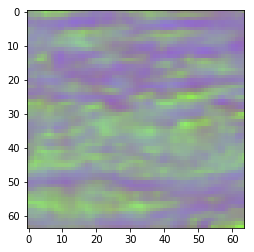

In [136]:
grid,dictionary = ip.get_dictionary_patches(image, 4, 2)
ip.show_im(ip.reconstruct_image_by_grid(dictionary,grid,4,image.shape[0]))

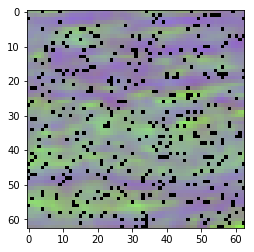

In [22]:
ip.show_im(ip.noise(ip.get_patch(126,126, 250, image), 0.1))

In [148]:
len(ip.get_incomplete_patches(image2, 250))

64

In [116]:
np.zeros((3,3))

[autoreload of ImageProcessing failed: Traceback (most recent call last):
  File "/Users/samutamminen/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/inpainting/ImageProcessing.py", line 123
    def getNeighbors(self, i, j, im, N):
      ^
IndentationError: expected an indented block
]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [226]:
from q2_2 import estimate_patch

noise_image = ip.noise(image, 0.01)

grid,dictionary = ip.get_dictionary_patches(noise_image, 10, 10)
clean_dico = ip.complet_dictionary(dictionary)
patch = dictionary[:,0]
print(estimate_patch(patch,clean_dico, 0.01))

[-1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775
 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.4069775 -1.406

In [162]:
patch

array([   0.5647059 ,    0.6390978 ,    0.52156866,    0.56630826,
          0.66906476,    0.54509807,    0.56666666,    0.7089552 ,
          0.5254902 ,    0.5673759 ,    0.72307694,    0.50980395,
          0.56630826,    0.7815126 ,    0.46666667,    0.5681004 ,
          0.8611111 ,    0.42352942,    0.57222223,    0.8108108 ,
          0.43529412,    0.57490635,    0.7739131 ,    0.4509804 ,
          0.5730337 ,    0.7739131 ,    0.4509804 ,    0.5740741 ,
          0.7964602 ,    0.44313726,    0.567029  ,    0.6092716 ,
          0.5921569 ,    0.5677083 ,    0.6486487 ,    0.5803922 ,
          0.56842107,    0.6737589 ,    0.5529412 ,    0.56842107,
          0.6643357 ,    0.56078434,    0.56842107,    0.70370376,
          0.5294118 ,    0.56842107,    0.766129  ,    0.4862745 ,
          0.57246375,    0.73599994,    0.49019608,    0.57789856,
          0.71317834,    0.5058824 ,    0.57608694,    0.7076923 ,
          0.50980395,    0.5752688 ,    0.69924814,    0.52156

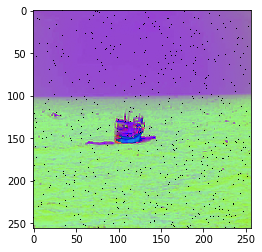

Now inpainted one!
columns :  2500
0


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


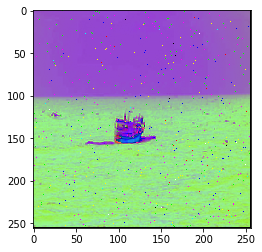

In [233]:
#dictionary = ip.get_dictionary_patches(image, 64, 64)
#ip.show_im(image)
#ip.show_im(ip.reconstruct_image(dictionary, 64,64))
noise_image = ip.noise(image, 0.01)
ip.show_im(noise_image)

#https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge ??

print("Now inpainted one!")
from IterativeInpainting import IterativeInpainting
h = 10
step = 5
iterations = 1
alphas = [0.01]
for a in alphas:
    inpainting = IterativeInpainting(noise_image, patch_sizes=h, step_size=step)
    inpainting.inpaint(max_iter=iterations, alpha=a)
    inpainting.show_image()

In [229]:
inpainting.image

array([[[0.56470591, 0.63909781, 0.52156866],
        [0.56630826, 0.66906476, 0.54509807],
        [0.56666666, 0.70895523, 0.52549022],
        ...,
        [0.57854408, 0.54374999, 0.627451  ],
        [0.57558137, 0.56953639, 0.59215689],
        [0.57291669, 0.60150379, 0.52156866]],

       [[0.567029  , 0.60927159, 0.59215689],
        [0.56770831, 0.64864868, 0.58039218],
        [0.56842107, 0.67375892, 0.5529412 ],
        ...,
        [0.57575756, 0.54658383, 0.63137257],
        [0.57386369, 0.53658539, 0.64313728],
        [0.57058823, 0.5029586 , 0.66274512]],

       [[0.567029  , 0.5443787 , 0.66274512],
        [0.56914896, 0.57317072, 0.64313728],
        [0.56884056, 0.58974355, 0.61176473],
        ...,
        [0.56818181, 0.52380949, 0.65882355],
        [0.56818181, 0.50867051, 0.67843139],
        [0.5670498 , 0.47802198, 0.71372551]],

       ...,

       [[0.56521744, 0.57499999, 0.627451  ],
        [0.56529212, 0.595092  , 0.63921571],
        [0.56397307, 0

/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


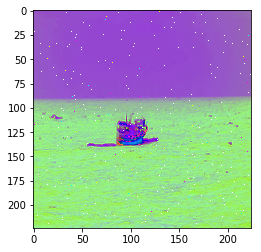

In [18]:
results = []
for iterations in range(1,5):
    inpainting = IterativeInpainting(noise_image, patch_sizes=h, step_size=step)
    noise_dictionary = inpainting.inpaint(max_iter=iterations, alpha=alpha)
    reconstructed_image = ip.reconstruct_image(noise_dictionary, h,step)
    results.append(np.count_nonzero(reconstructed_image == 0))
ip.show_im(reconstructed_image)

False